In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets 

from ipywidgets import interact, interactive

In [2]:
df = pd.read_csv('data/dataset.csv', low_memory = False)
len(df)


2171458

In [3]:
df = df.drop(columns=['Consumer_number', 'Measure_method', 'Consumo', 'Installation_number', 'Zona_cob',
                      'Counter_number', 'Counter_manufacturer', 'Counter_caliber'])
df.sample(5)

,Year,Month,Consumer_type,Installation_zone,Consumption
1894921,2020,2,1,4,4
890111,2016,11,9,59,0
717842,2016,5,1,3,9
784915,2016,7,9,50,2
371257,2014,3,9,25,6


In [4]:
zonas = pd.read_excel("data/geo_data/apoio/zona_coordinates.xlsx", sheet_name="Folha1")
zonas.head()

,Zona,Nome,X,Y
0,1,Gimonde,0,0
1,3,Santa-Maria,0,1
2,4,Samil,0,2
3,6,Sé,0,3
4,22,Crijó de Parada,0,4


In [95]:
data = df.merge(zonas, left_on='Installation_zone', right_on='Zona')
data = data.drop(columns='Installation_zone')
data = data.rename(columns={'Nome' : 'Zone_name', 'Zona' : 'Zone_code'})
data.head()

,Year,Month,Consumer_type,Consumption,Zone_code,Zone_name,X,Y
0,2013,1,1,0,4,Samil,0,2
1,2013,1,1,11,4,Samil,0,2
2,2013,1,1,7,4,Samil,0,2
3,2013,1,4,16,4,Samil,0,2
4,2013,1,1,5,4,Samil,0,2


In [139]:
year = data[data['Consumer_type'] == 1]
year = year.drop(columns=['Zone_name', 'Month', 'Consumer_type'])
year


,Year,Consumption,Zone_code,X,Y
0,2013,0,4,0,2
1,2013,11,4,0,2
2,2013,7,4,0,2
4,2013,5,4,0,2
5,2013,5,4,0,2
...,...,...,...,...,...
2141528,2014,9,63,6,4
2141657,2014,7,63,6,4
2141786,2014,7,63,6,4
2141915,2014,2,63,6,4


In [140]:
year = year.groupby('Year')
year

In [141]:
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020]

In [122]:
zona = year.get_group(2013)
zona = zona.drop(columns=['Year'])
zona = zona.groupby(['Zone_code', 'X', 'Y']).mean()
zona = zona.reset_index()
zona = zona.drop(columns=['Zone_code'])   
typ_zona = zonas.drop(columns=['Zona', 'Nome'])
typ_zona = pd.merge(typ_zona, zona, how='left', left_on=['X','Y'], right_on = ['X','Y'])
typ_zona




,X,Y,Consumption
0,0,0,5.984114
1,0,1,5.797774
2,0,2,5.800945
3,0,3,5.098179
4,0,4,NaN
5,0,5,NaN
6,0,6,NaN
7,1,0,NaN
8,1,1,NaN
9,1,2,NaN


In [142]:
values = []
for ano in (years):
    zona = year.get_group(ano)
    zona = zona.drop(columns=['Year'])
    zona = zona.groupby(['Zone_code', 'X', 'Y']).mean()
    zona = zona.reset_index()
    zona = zona.drop(columns=['Zone_code'])   
    typ_zona = zonas.drop(columns=['Zona', 'Nome'])
    typ_zona = pd.merge(typ_zona, zona, how='left', left_on=['X','Y'], right_on = ['X','Y'])
    zona = typ_zona.pivot(index='X', columns='Y', values='Consumption')
    values.append(zona)

   
    
#     zona_0 = typ_zona.pivot(index='X', columns='Y', values='Consumption')
#     print(zona_0)
#     values.append(zona_0)
#     zona = year.get_group(ano)
#     print(zona)
    
#     zona = zona.drop(columns=['Year'])
#     zona = zona.groupby(['Zone_code', 'X', 'Y']).mean()
#     zona['Consumption'] = ((zona['Consumption'] - zona['Consumption'].min()) * 10) / (zona['Consumption'].max() - zona['Consumption'].min())
#     zona = zona.reset_index()
#     zona = zona.drop(columns=['Zone_code'])
#     zona = zona.pivot(index='X', columns='Y', values='Consumption')
#     values.append(zona)


In [124]:
anos_dict = {2013:0, 2014:1, 2016:2, 2017:3, 2018:4, 2019:5, 2020:6, 2015:7}
def choose_year(year):
    return anos_dict[year]

In [145]:
slider = ipywidgets.IntSlider(value=0,
                              min=2013,
                              max=2020,
                              step=1,
                              description='Ano:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')
# slider

In [146]:
def draw_ano(var):
    sns.set(rc={'figure.figsize':(14,10)})
    sns.axes_style("white")
    index = choose_year(var)
    plot = sns.heatmap(values[index], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=False,
                yticklabels=False,
                annot=True)
    plot.set_title('Consumo da agua por ano')
    plt.show()

In [147]:
interact(draw_ano, var=slider) 

interactive(children=(IntSlider(value=2013, continuous_update=False, description='Ano:', max=2020, min=2013), …

<function __main__.draw_ano(var)>

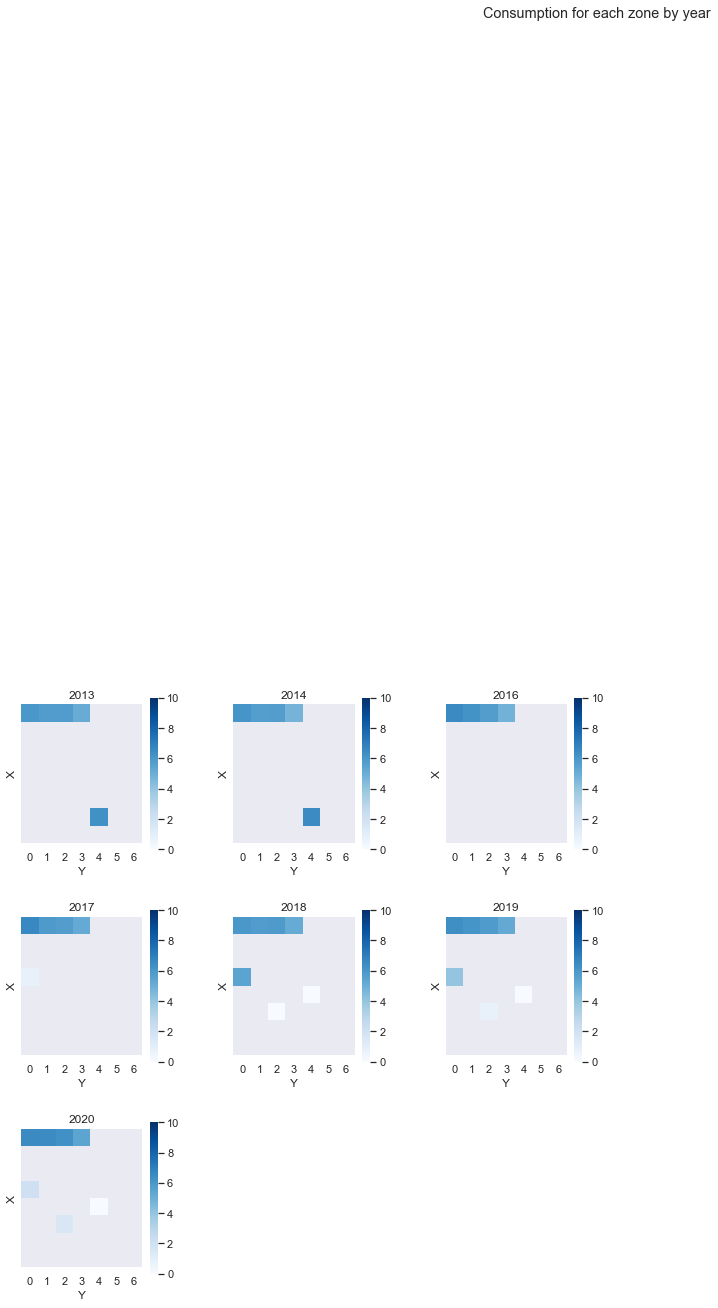

In [144]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharey=True)
fig.suptitle('Consumption for each zone by year')
axes[0][0].set_title(str(years[0]))
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(values[0], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][0])
axes[0][1].set_title(str(years[1]))
sns.axes_style("white")
sns.heatmap(values[1], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][1])
axes[0][2].set_title(str(years[2]))
sns.axes_style("white")
sns.heatmap(values[2], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][2])
axes[1][0].set_title(str(years[3]))
sns.axes_style("white")
sns.heatmap(values[3], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][0])

axes[1][1].set_title(str(years[4]))
sns.axes_style("white")
sns.heatmap(values[4], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][1])
axes[1][2].set_title(str(years[5]))
sns.axes_style("white")
sns.heatmap(values[5], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][2])
axes[2][0].set_title(str(years[6]))
sns.axes_style("white")
sns.heatmap(values[6], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[2][0])

axes[2][1].set_visible(False)
axes[2][2].set_visible(False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.5, 
                    top=0.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('charts/Year_heatmap.png')
plt.show(block=True)
plt.show()
    

# Consumer tipo heatmap

In [14]:
consumer_type =  data.drop(columns=['Year', 'Month', 'Zone_name'])
consumer_type.head()

,Consumer_type,Consumption,Zone_code,X,Y
0,1,0,4,0,2
1,1,11,4,0,2
2,1,7,4,0,2
3,4,16,4,0,2
4,1,5,4,0,2


In [16]:
data.head()


,Year,Month,Consumer_type,Consumption,Zone_code,Zone_name,X,Y
0,2013,1,1,0,4,Samil,0,2
1,2013,1,1,11,4,Samil,0,2
2,2013,1,1,7,4,Samil,0,2
3,2013,1,4,16,4,Samil,0,2
4,2013,1,1,5,4,Samil,0,2


In [25]:
tipo_values = []
for tipo in (df.Consumer_type.unique()):
    zona_0 = data[data['Consumer_type'] == tipo]
    zona_0 = zona_0.drop(columns=['Consumer_type'])
    zona_0 = zona_0.groupby(['Zone_code', 'X', 'Y']).mean()
    zona_0 = zona_0.reset_index()
#     zona_0['Consumption'] = ((zona_0['Consumption'] - zona_0['Consumption'].min()) * 10) / (zona_0['Consumption'].max() - zona_0['Consumption'].min())
    zona_0 = zona_0.drop(columns=['Zone_code'])
    typ_zona = zonas.drop(columns=['Zona'])
    typ_zona = pd.merge(typ_zona, zona_0, how='left', left_on=['X','Y'], right_on = ['X','Y'])
    
    zona_0 = typ_zona.pivot(index='X', columns='Y', values='Consumption')
#     print(zona_0)
    tipo_values.append(zona_0)

In [26]:
slider1 = ipywidgets.IntSlider(value=0,
                              min=0,
                              max=20,
                              step=1,
                              description='Tipo de Cons:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')

In [27]:
# %reset_selective -f slider
def draw_tipo(var):
    sns.set(rc={'figure.figsize':(14,10)})
    sns.axes_style("white")
    plot = sns.heatmap(tipo_values[var], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=False,
                yticklabels=False,
                annot=True)
    plot.set_title('Consumo da agua por tipo de consumidor')
    plt.show()

In [28]:
interact(draw_tipo, var=slider1)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Tipo de Cons:', max=20), Output…

<function __main__.draw_tipo(var)>

In [132]:
%reset_selective -f slider1